# Customizing Location of Subplot Using GridSpec

GridSpec:
	- specifies the geometry of the grid that a subplot will be placed. 分割一个figure，要指定rows和columns

SubPlotSpec:
	- specifies the location of the subplot in the given GridSpec.

subplot2grid:
	- a helper function that is similar to 'subplot()'

In [2]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot(2, 2, 1)

> Note that, unlike Matplotlib’s subplot, subplot2grid's index starts from 0 in GridSpec(0, 0)
subplot's index starts from 1.

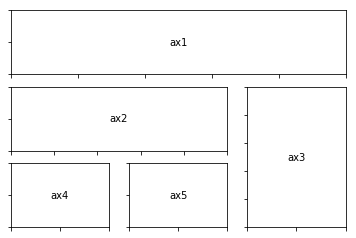

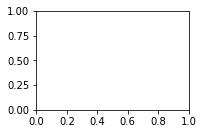

In [4]:
# if we want to create subplot that occupies multiple cells
plt.figure(0)  # create a figure

# create subfigure in the figure. 分割figure(0)
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))


def make_labels(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)

make_labels(plt.gcf())  # plt.gcf()   return the current figure
plt.show()

### 可以将这里的 figure 当做画板， ax 当做子画板。我们都可以在上面画图。但是在画图的时候 应该清楚 当前选中的画板或者是子画板。

```
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2)
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4)


plt.figure(1) # create figure 1, current figure 1
plt.figure(2) # create figure 2, current figure 2

plt.figure(1) # select figure 1, current figure 1
ax1 = plt.subplot(211) # create sub-figure 1 in figure 1. 

# if we want to plot in ax1, use ax1 to do plot
plt.sca(ax1) # select ax1 sub plot

```

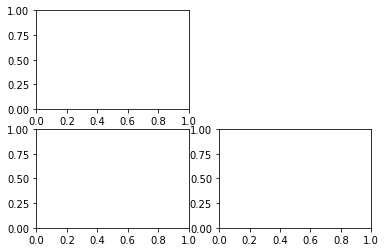

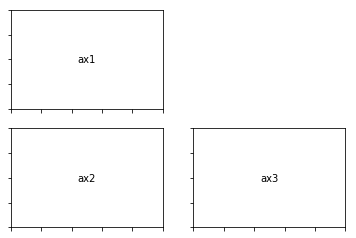

In [8]:
import matplotlib.gridspec as gridspec
plt.figure(3)
gs = gridspec.GridSpec(2, 2)  # segment the figure into 2*2 pieces ; 
ax = plt.subplot(gs[0, 0]) # specifies which grid that a subplot will be placed

# occupy multiple cells by using subplot()
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
make_labels(plt.gcf())
plt.show()

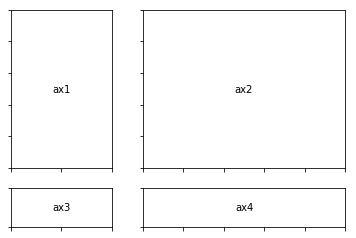

In [11]:
# By default, GridSpec creates cells of equal sizes.
#  You can adjust relative heights and widths of rows and columns.
plt.figure(4)
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 2],
                       height_ratios=[4, 1]
                       )

# we can also access gs[0, 1] by gs[2]
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
make_labels(plt.gcf())
plt.show()